In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import sklearn
import os
import seaborn as sns
from google.colab.patches import cv2_imshow
import glob
import keras
from keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation, Flatten, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD

In [ ]:
seed = 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 batch_size=32

In [ ]:
train_path="/content/drive/MyDrive/Capstone_data/Clahe_train"
test_path="/content/drive/MyDrive/Capstone_data/Clahe_test"
val_path="/content/drive/MyDrive/Capstone_data/Clahe_val"

In [ ]:
train_normal = glob.glob(train_path+"/normal/*.jpeg")
train_pneumonia = glob.glob(train_path+"/pneumonia/*.jpeg")

test_normal = glob.glob(test_path+"/normal/*.jpeg")
test_pneumonia = glob.glob(test_path+"/pneumonia/*.jpeg")

val_normal = glob.glob(val_path+"/normal/*.jpeg")
val_pneumonia = glob.glob(val_path+"/pneumonia/*.jpeg")

In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [ ]:
df_train.head()
df_test.head()
df_val.head()

,class,image
0,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...
1,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...
2,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...
3,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...
4,Normal,/content/drive/MyDrive/Capstone_data/Clahe_val...


In [ ]:
df_train=df_train.sample(frac=1)

In [ ]:
df_train.head()

,class,image
3186,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...
3958,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...
3756,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...
1097,Normal,/content/drive/MyDrive/Capstone_data/Clahe_tra...
2125,Pneumonia,/content/drive/MyDrive/Capstone_data/Clahe_tra...


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
Y = df_train[['class']]

kf = KFold(n_splits = 5)
                         
skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
        rescale = 1./255)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16
from tensorflow.keras.layers.experimental.preprocessing import Normalization

In [ ]:
df_train.shape
n=5216

In [ ]:
x=len(train_normal)
y=len(train_pneumonia)
s1=(x+y)//batch_size
a=len(test_normal)
b=len(test_pneumonia)
s2=(a+b)//batch_size

In [ ]:
from keras.callbacks import ReduceLROnPlateau
import numpy as np
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import load_model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np

In [ ]:
from tensorflow import keras
from keras import optimizers
import matplotlib.pyplot as plt

In [ ]:
def printHistory(history, title, epochs):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1,epochs+1))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs+1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs+1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(predictions, labels,auc):
    fpr, tpr, thresholds = roc_curve(labels, predictions) 
    plt.title('Receiver Operating Characteristic (ROC)  Curve',fontsize=14)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot(fpr, tpr, 'g',label = 'AUC Score = %0.2f' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('\nTrue Positive Rate (TPR)', fontsize=12)
    plt.xlabel('\nFalse Positive Rate (FPR)', fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def conf(cm,target_names):
    plt.figure(figsize=(5,3))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True,xticklabels=['H', 'P'], yticklabels=['H', 'P'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
    plt.yticks(rotation=0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    ax.xaxis.set_ticks_position('top') 
    plt.title('Confusion matrix')
    plt.show()

K-Fold1
Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
58889256/58889256 [==============================] - 3s 0us/step


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.7069
Epoch 1: val_accuracy improved from -inf to 0.33365, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam1.h5
260/260 [==============================] - 1161s 4s/step - loss: 0.7152 - accuracy: 0.7069 - val_loss: 2.6182 - val_accuracy: 0.3337 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.5069 - accuracy: 0.8263
Epoch 2: val_accuracy improved from 0.33365 to 0.74231, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam1.h5
260/260 [==============================] - 121s 466ms/step - loss: 0.5069 - accuracy: 0.8263 - val_loss: 2.5687 - val_accuracy: 0.7423 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.4122 - accuracy: 0.8648
Epoch 3: val_accuracy improved from 0.74231 to 0.90096, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam1.h5
260/260 [=================

<ipython-input-21-950ce0e522b5>:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


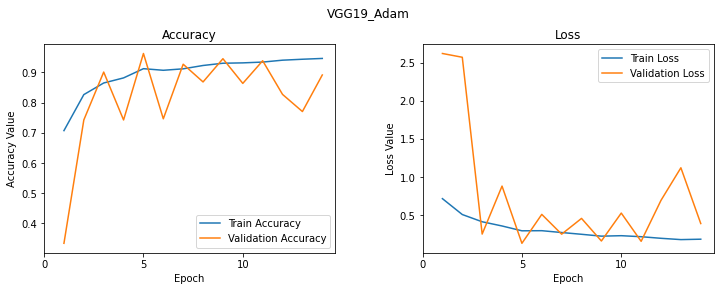

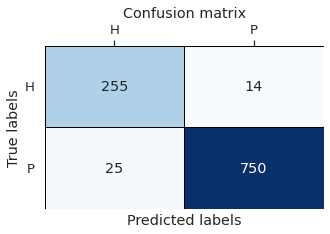

Classification Report
              precision    recall  f1-score   support

      Normal       0.91      0.95      0.93       269
   Pneumonia       0.98      0.97      0.97       775

    accuracy                           0.96      1044
   macro avg       0.95      0.96      0.95      1044
weighted avg       0.96      0.96      0.96      1044



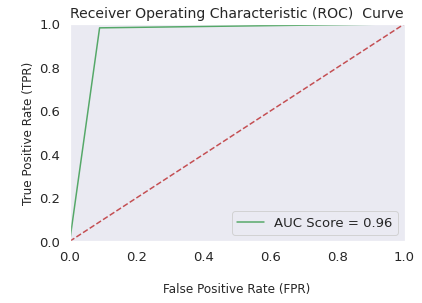

K-Fold2
Found 4173 validated image filenames belonging to 2 classes.
Found 1043 validated image filenames belonging to 2 classes.


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.7245 - accuracy: 0.6933
Epoch 1: val_accuracy improved from -inf to 0.25673, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam2.h5
260/260 [==============================] - 124s 460ms/step - loss: 0.7245 - accuracy: 0.6933 - val_loss: 5.9072 - val_accuracy: 0.2567 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.5207 - accuracy: 0.8090
Epoch 2: val_accuracy improved from 0.25673 to 0.37788, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam2.h5
260/260 [==============================] - 124s 478ms/step - loss: 0.5207 - accuracy: 0.8090 - val_loss: 1.9092 - val_accuracy: 0.3779 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.4198 - accuracy: 0.8518
Epoch 3: val_accuracy improved from 0.37788 to 0.74808, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam2.h5
260/260 [===============

<ipython-input-21-950ce0e522b5>:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


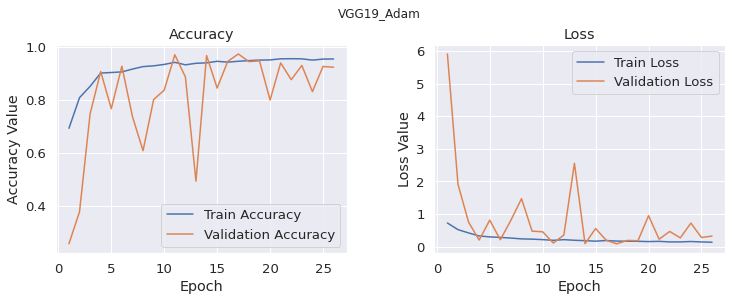

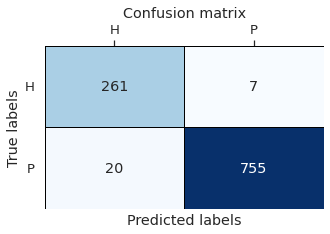

Classification Report
              precision    recall  f1-score   support

      Normal       0.93      0.97      0.95       268
   Pneumonia       0.99      0.97      0.98       775

    accuracy                           0.97      1043
   macro avg       0.96      0.97      0.97      1043
weighted avg       0.97      0.97      0.97      1043



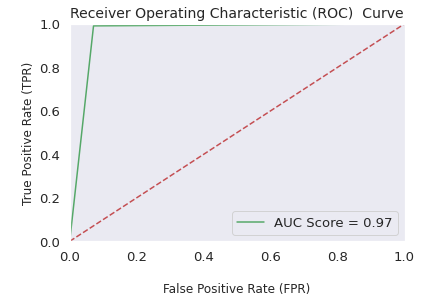

K-Fold3
Found 4173 validated image filenames belonging to 2 classes.
Found 1043 validated image filenames belonging to 2 classes.


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.7394 - accuracy: 0.6781
Epoch 1: val_accuracy improved from -inf to 0.25769, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam3.h5
260/260 [==============================] - 124s 459ms/step - loss: 0.7394 - accuracy: 0.6781 - val_loss: 4.4865 - val_accuracy: 0.2577 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.5204 - accuracy: 0.8064
Epoch 2: val_accuracy improved from 0.25769 to 0.26154, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam3.h5
260/260 [==============================] - 118s 455ms/step - loss: 0.5204 - accuracy: 0.8064 - val_loss: 9.9732 - val_accuracy: 0.2615 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.4092 - accuracy: 0.8648
Epoch 3: val_accuracy improved from 0.26154 to 0.74231, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam3.h5
260/260 [===============

<ipython-input-21-950ce0e522b5>:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


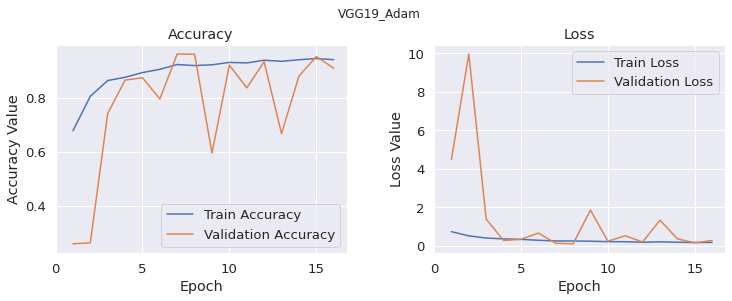

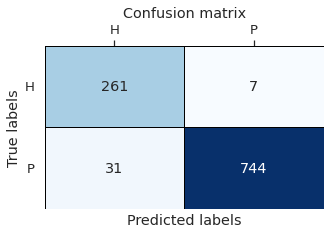

Classification Report
              precision    recall  f1-score   support

      Normal       0.89      0.97      0.93       268
   Pneumonia       0.99      0.96      0.98       775

    accuracy                           0.96      1043
   macro avg       0.94      0.97      0.95      1043
weighted avg       0.97      0.96      0.96      1043



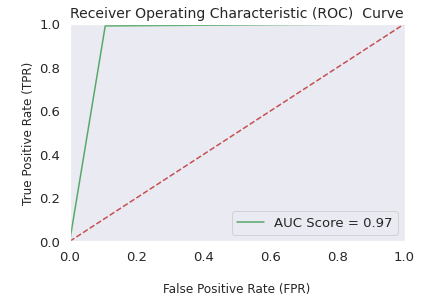

K-Fold4
Found 4173 validated image filenames belonging to 2 classes.
Found 1043 validated image filenames belonging to 2 classes.


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.6642 - accuracy: 0.7477
Epoch 1: val_accuracy improved from -inf to 0.87500, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam4.h5
260/260 [==============================] - 124s 459ms/step - loss: 0.6642 - accuracy: 0.7477 - val_loss: 0.3199 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.5032 - accuracy: 0.8292
Epoch 2: val_accuracy did not improve from 0.87500
260/260 [==============================] - 118s 455ms/step - loss: 0.5032 - accuracy: 0.8292 - val_loss: 3.5950 - val_accuracy: 0.2558 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.3993 - accuracy: 0.8660
Epoch 3: val_accuracy did not improve from 0.87500
260/260 [==============================] - 119s 457ms/step - loss: 0.3993 - accuracy: 0.8660 - val_loss: 7.6157 - val_accuracy: 0.2558 - lr: 7.5000e-05
Epoch 4/30
260/260 [========

<ipython-input-21-950ce0e522b5>:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


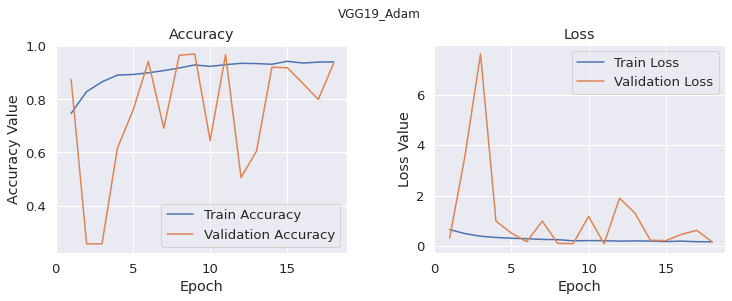

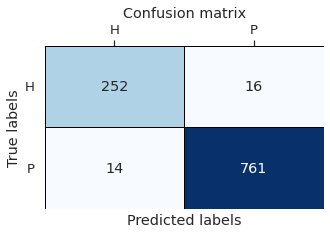

Classification Report
              precision    recall  f1-score   support

      Normal       0.95      0.94      0.94       268
   Pneumonia       0.98      0.98      0.98       775

    accuracy                           0.97      1043
   macro avg       0.96      0.96      0.96      1043
weighted avg       0.97      0.97      0.97      1043



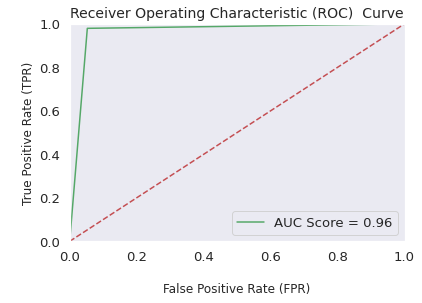

K-Fold5
Found 4173 validated image filenames belonging to 2 classes.
Found 1043 validated image filenames belonging to 2 classes.


Epoch 1/30
260/260 [==============================] - ETA: 0s - loss: 0.6969 - accuracy: 0.7327
Epoch 1: val_accuracy improved from -inf to 0.88942, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam5.h5
260/260 [==============================] - 126s 467ms/step - loss: 0.6969 - accuracy: 0.7327 - val_loss: 0.4040 - val_accuracy: 0.8894 - lr: 1.0000e-04
Epoch 2/30
260/260 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.8335
Epoch 2: val_accuracy improved from 0.88942 to 0.91154, saving model to /content/drive/MyDrive/Capstone_data/crvgg16mnt_adam5.h5
260/260 [==============================] - 132s 505ms/step - loss: 0.5091 - accuracy: 0.8335 - val_loss: 0.3764 - val_accuracy: 0.9115 - lr: 1.0000e-04
Epoch 3/30
260/260 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.8872
Epoch 3: val_accuracy did not improve from 0.91154
260/260 [==============================] - 119s 459ms/step - loss: 0.3851 - accuracy: 0.8872 - val_los

<ipython-input-21-950ce0e522b5>:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = modela.predict_generator(valid_data_generator)


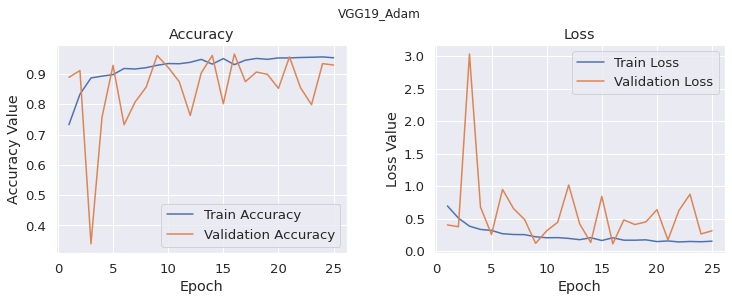

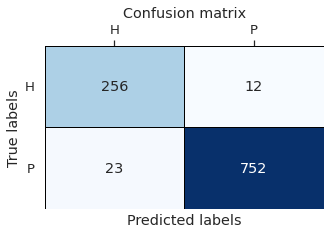

Classification Report
              precision    recall  f1-score   support

      Normal       0.92      0.96      0.94       268
   Pneumonia       0.98      0.97      0.98       775

    accuracy                           0.97      1043
   macro avg       0.95      0.96      0.96      1043
weighted avg       0.97      0.97      0.97      1043



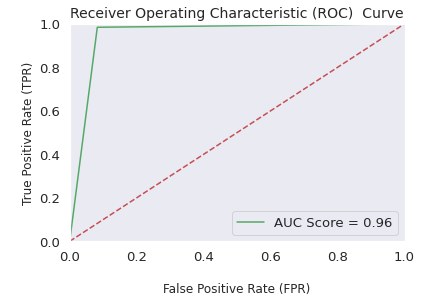

In [ ]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []
TRAINING_ACCURACY=[]
TRAINING_LOSS=[]

save_dir = '/content/drive/MyDrive/Capstone_data/Clahe_train'
fold_var=1
fine_tune_at=0
t=df_train[['class']]
for train_index, val_index in skf.split(np.zeros(len(Y)),Y):
	print("K-Fold"+str(fold_var))
	training_data = df_train.iloc[train_index]
	validation_data = df_train.iloc[val_index]
	
	train_data_generator = train_datagen.flow_from_dataframe(dataframe=training_data,x_col="image",y_col="class",target_size=(224,224),
                                               batch_size=32,class_mode='categorical',shuffle=True)
	valid_data_generator  = test_datagen.flow_from_dataframe(dataframe=validation_data,x_col="image",y_col="class",target_size=(224,224),
                                               batch_size=32,class_mode='categorical',shuffle=False)
        
 	# CREATE NEW MODEL
	model = Sequential()
	conv_base = VGG16(input_shape=[224,224]+[3], include_top=False, weights='imagenet')
	for layer in conv_base.layers[:fine_tune_at]:
		layer.trainable = False
	x=  conv_base.output
	x = GlobalAveragePooling2D()(x)
	x = BatchNormalization()(x)
	x = Dropout(0.3)(x) 
	x = Dense(512, activation ='relu')(x)
	x = BatchNormalization()(x)
	x = Dropout(0.5)(x)
	x = Dense(2, activation ='sigmoid')(x)
	model = Model(conv_base.input, x)
	reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=7)
	early_stopping = EarlyStopping(monitor = "val_accuracy",patience = 9,verbose = 1,mode = "max",)
	checkpoint = ModelCheckpoint(monitor = "val_accuracy",filepath = "/content/drive/MyDrive/Capstone_data/crvgg16mnt_adam"+str(fold_var)+".h5",verbose = 1,save_best_only = True, )
	opt = keras.optimizers.Adam(lr=0.0001)
	model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = "accuracy")
	s1=train_data_generator.n//train_data_generator.batch_size
	s2=valid_data_generator.n//valid_data_generator.batch_size
	lr_sched = LearningRateScheduler(lambda epoch: 1e-4 * (0.75 ** np.floor(epoch / 2)))
	history = model.fit(train_data_generator,
    epochs = 30, 
    batch_size = 16,
    validation_data = valid_data_generator,
    validation_steps = s2,
    steps_per_epoch = s1,
    callbacks = [reduce_lr, early_stopping, checkpoint,lr_sched])
	if early_stopping.stopped_epoch==0:
		x=30
	else:
		x=early_stopping.stopped_epoch+1
	printHistory(history,"VGG16_Adam",x)
	modela = load_model("/content/drive/MyDrive/Capstone_data/crvgg16mnt_adam"+str(fold_var)+".h5")
	
	results = modela.evaluate(valid_data_generator)
	results = dict(zip(model.metrics_names,results))
	Y_pred = modela.predict_generator(valid_data_generator)
	y_pred = np.argmax(Y_pred, axis=1)
	target_names = ['Normal','Pneumonia']
	cm = confusion_matrix(valid_data_generator.classes, y_pred)
	conf(cm,target_names)
	print('Classification Report')
	print(classification_report(valid_data_generator.classes, y_pred, target_names=target_names))
	auc = roc_auc_score(valid_data_generator.classes, y_pred) 
	plot_roc_curve(valid_data_generator.classes, y_pred,auc)
	TRAINING_ACCURACY.append(history.history['accuracy'])
	TRAINING_LOSS.append(history.history['loss'])
	VALIDATION_ACCURACY.append(history.history['val_accuracy'])
	VALIDATION_LOSS.append(history.history['val_loss'])

	fold_var += 1

In [ ]:
l1=max(VALIDATION_ACCURACY[0])
l2=max(VALIDATION_ACCURACY[1])
l3=max(VALIDATION_ACCURACY[2])
l4=max(VALIDATION_ACCURACY[3])
l5=max(VALIDATION_ACCURACY[4])

avg=(l1+l2+l3+l4+l5)/5
avg

0.9674999952316284